<a href="https://colab.research.google.com/github/AlphonsaJo/Lab_1_MachineLearning/blob/main/Lab8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A1. For the data provided below, calculate the prior probability for each class.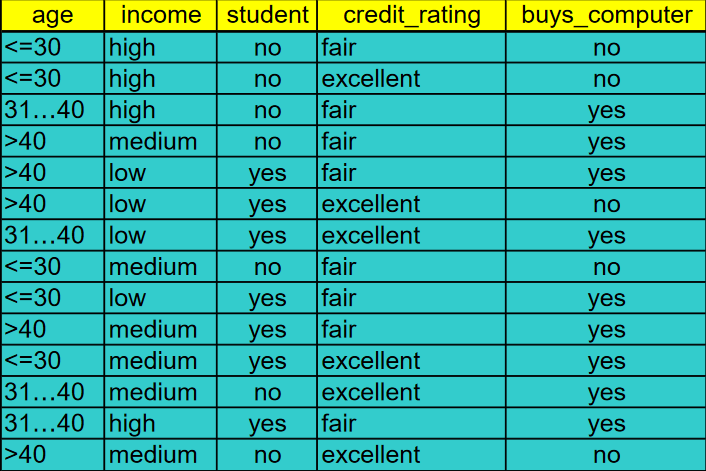

In [1]:
import pandas as pd

# Create a DataFrame from the provided data
data = {
    'age': ['<=30', '<=30', '31...40', '>40', '>40', '>40', '31...40', '<=30', '<=30', '>40', '<=30', '31...40', '31...40', '>40'],
    'income': ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium', 'low', 'medium', 'medium', 'medium', 'high', 'medium'],
    'student': ['no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no'],
    'credit_rating': ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'excellent'],
    'buys_computer': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no'],
}

df = pd.DataFrame(data)

# Calculate the prior probability for each class
class_counts = df['buys_computer'].value_counts()
total_count = df.shape[0]
#no of instances are counted in the given dataset to calculate pior probability
for class_label, count in class_counts.items():
    prior_probability = count / total_count
    print(f"Prior probability of class {class_label}: {prior_probability}")

Prior probability of class yes: 0.6428571428571429
Prior probability of class no: 0.35714285714285715


A2. Calculate the class conditional densities for various features & classes. Observe if any class
conditional density has zero values.

In [4]:
# Calculate the class conditional densities for various features & classes
class_conditional_densities = {}

for feature in df.columns[:-1]:
    for class_label in df['buys_computer'].unique():
        class_conditional_densities[(feature, class_label)] = df[df['buys_computer'] == class_label][feature].value_counts(normalize=True)

# Check if any class conditional density has zero values
zero_values_found = False

for feature, class_label in class_conditional_densities:
    if 0 in class_conditional_densities[(feature, class_label)]:
        zero_values_found = True
        break

if zero_values_found:
    print("Yes, some class conditional densities have zero values.")
else:
    print("No, no class conditional densities have zero values.")


No, no class conditional densities have zero values.


In [5]:
# Test for independence between the features using chi-square test
from scipy.stats import chi2_contingency

for feature1 in df.columns[:-2]:
    for feature2 in df.columns[:-2]:
        if feature1 != feature2:
            contingency_table = pd.crosstab(df[feature1], df[feature2])
            chi2_statistic, p_value, degrees_of_freedom, expected_counts = chi2_contingency(contingency_table)

            print(f"Feature 1: {feature1}, Feature 2: {feature2}")
            print(f"Chi-squared statistic: {chi2_statistic}")
            print(f"p-value: {p_value}")
            print(f"Degre

SyntaxError: ignored